# Download Data

In [1]:
!wget -nc https://archive.org/download/creditcard_202311/creditcard.csv

File ‘creditcard.csv’ already there; not retrieving.



In [2]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark-palette') # ( /・・)ノ

In [4]:
# read the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# look at all the target classes
set(df['Class'])

{0, 1}

### Time
The time column is more of a timestamp than a feature for prediction. It might be useful for a time series model (classic forecast methods or deep learning), but it makes no sense trying to fit timestamps to a gaussian distribution and expect them to serve as a predictive feature. There will need to be some feature transformation for this to be useful. In the meantime, lets look at the distributions:

<Axes: >

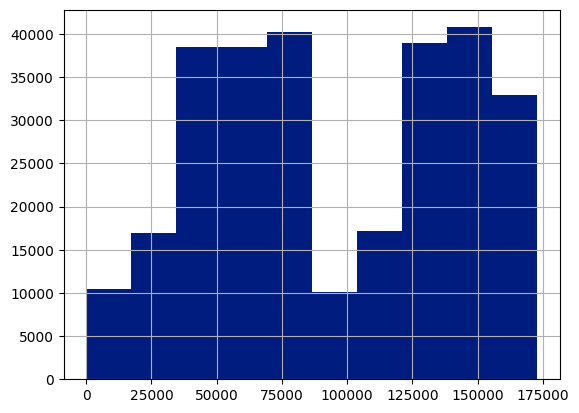

In [7]:
df['Time'].hist() # no gaussian

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# look at the distribution of the time column separated by target class
df_0,df_1 = df[df["Class"] == 0],df[df["Class"] == 1]

<Axes: >

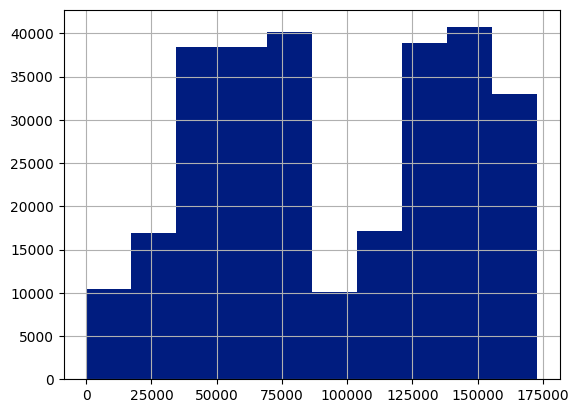

In [10]:
df_0["Time"].hist()

<Axes: >

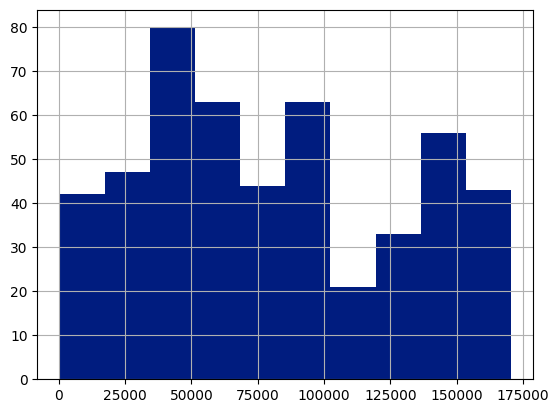

In [11]:
df_1["Time"].hist() # still not gaussian

In [26]:
def plot_per_class_distributions(df,feature,target_column,target_2_label):
  """
  Receives a dataframe and a feature (must match on the dataframe's columns). The idea is to plot each
  feature's distribution alongside a kernel distribution estimate to compare them and see posible feature that
  may be useful for making prediction (by looking at the amount of overlap between the distributions).
  It currenlty supports up to 8 classes because of the limit of matplotlib default colors. This is more than enough
  most problems
  Arguments
  - df: The dataframe you are working with
  - feature: the feature (column name) whose distributions across the target values you wish to compare
  - target column: The column name that corresponds to the targets
  - target_mapping: dictionary mapping the target columns values to labels
  """
  colors = ["r","b","g","c","m","y","b","w"] # default colors
  target_values = list(set(df[target_column])) # obtrain all the possible target values
  df_per_class = list() # store the subdatasets separated per target value
  for target_value in target_values: # obtain a list of subsets per target value
    df_subset = df[df[target_column] == target_value]
    df_per_class.append(df_subset)
  for i,subset in enumerate(df_per_class):
    sns.histplot(
        subset[feature], # only work with the feature in cuestion
        bins = 50,
        color = colors[i],
        kde=True,
        stat="density",
        linewidth=0,
        label = target_2_label[target_values[i]]
    )
  plt.title(feature)
  plt.legend()

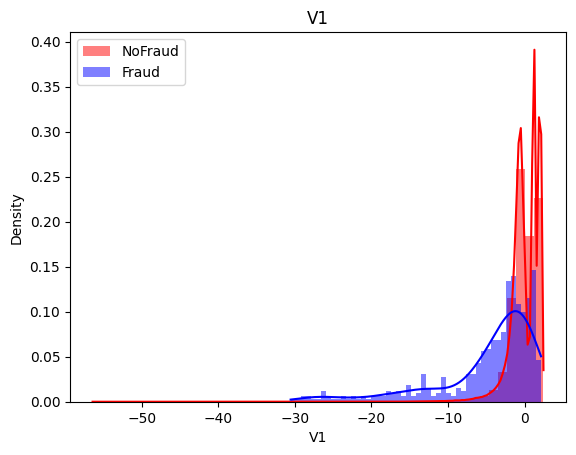

In [27]:
# test the weird function above
target_2_label = {
    0: "NoFraud",
    1: "Fraud"
}

plot_per_class_distributions(df=df,feature = "V1",target_column="Class",target_2_label=target_2_label)

In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
features_for_comparison = df.columns[:-1]
features_for_comparison, len(features_for_comparison)

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
       dtype='object'),
 30)

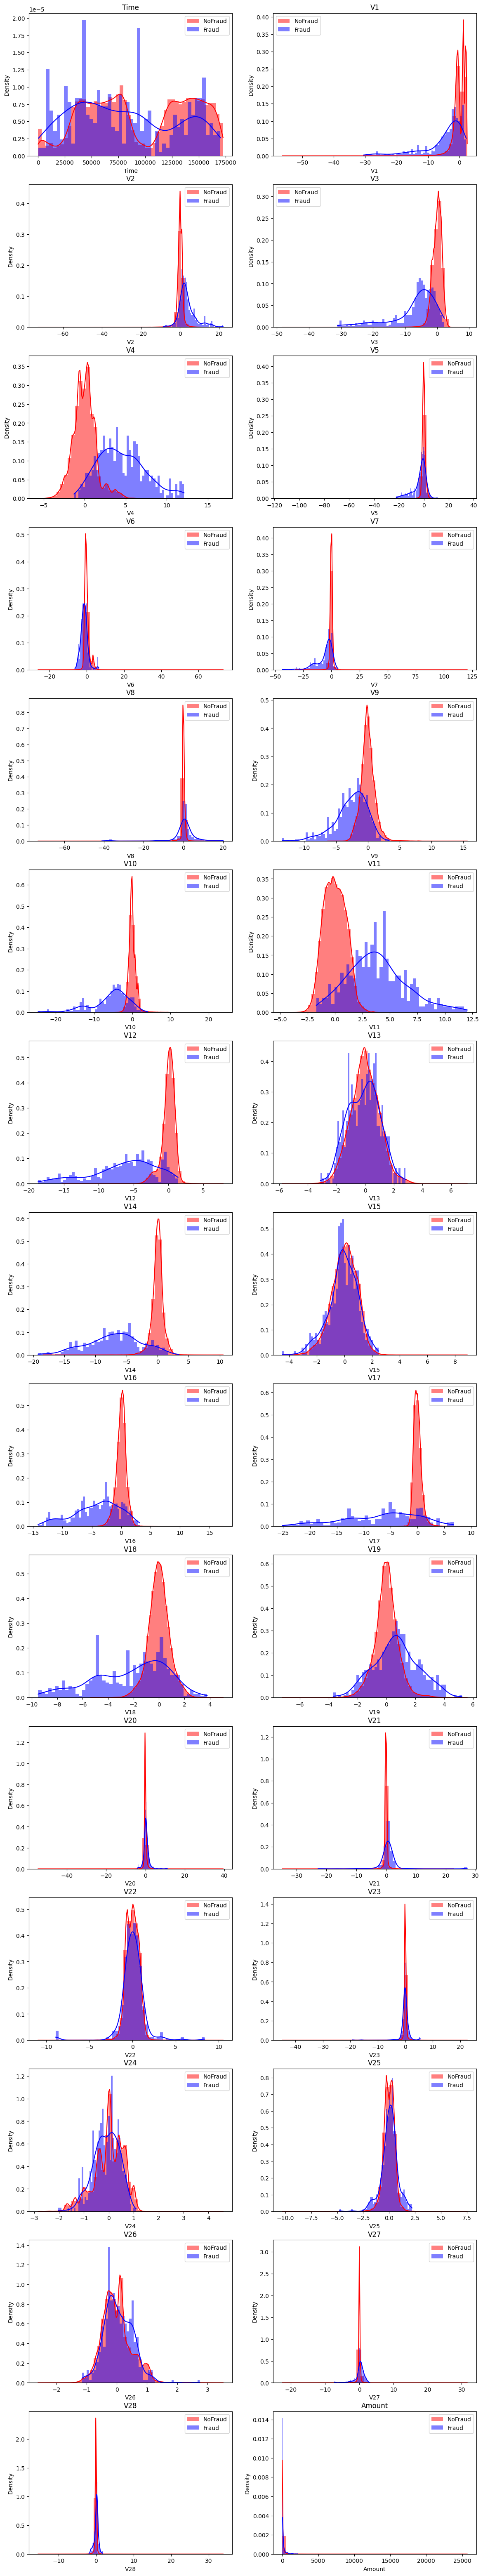

In [37]:
n_rows,n_cols = 15,2
plt.figure(figsize=(14,80))
for i,feature in enumerate(features_for_comparison):  #plot_per_class_distributions(df=df,feature = feature,target_column="Class",target_2_label=target_2_label)
  plt.subplot(n_rows,n_cols,i+1)
  plot_per_class_distributions(df=df,feature = feature,target_column="Class",target_2_label=target_2_label)
plt.savefig("fraud_detection_kernel_density_estimates.png")

The features where obtained using principal component analysis in order to ofuscate the idenity of the people whose transactions were used to create the dataset. We need not know the original features as we can just compare the distributions per class to determine which ones might be good for separation. <BR/>
So far, the following features are good:
- V3
- V4
- V10
- V11
- V12
- V14
<BR/>
For the amount variable there is along tail distributions. Most the values are small and very few values are extremly large. We will try to compute the log transform to put the data into a better range of values and try to accomodate to a gaussian.

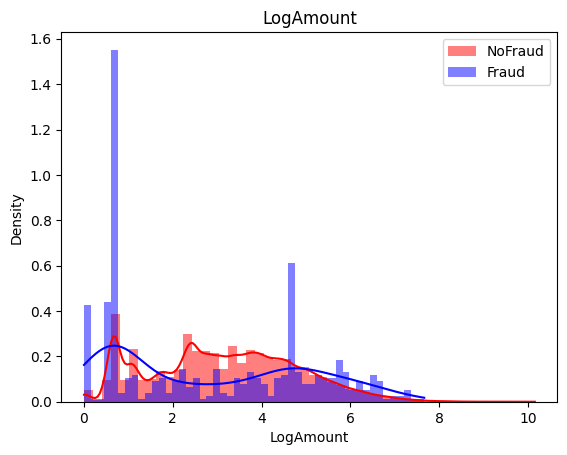

In [38]:
# apply log transformation
df['LogAmount'] = np.log1p(df['Amount'])
plot_per_class_distributions(df=df,feature = "LogAmount",target_column="Class",target_2_label=target_2_label)


We cannot do cross validation because of the sequential nature of the data. The samples come from timestamps. This is the same issue as with time series: the use case for the classifier is to be trained in past data and be used to predict future data. With cross validation methods, the dataset is randomly shuffled and accomodated into random datasets making the timestamps loose any sequential meaning. The same holds with a random train test split that we will try nonetheless.  

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [40]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337) # this is actually a horrible idea

In [41]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'LogAmount'],
      dtype='object')

In [46]:
features = list(df.columns)[:-2]
features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [48]:
X_train,y_train = df_train[features],df_train["Class"] # training data and labels
X_test,y_test = df_test[features],df_test["Class"] # testing data and labels

In [49]:
# train the model
model = GaussianNB()
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.9923368956966359
[~] test acc: 0.9935746638109617


The fraudulent transactions must be far less than the legitimate transactions, so we need to verify whether the dataset is balanced or imbalanced.

In [50]:
(df['Class'] == 1).sum() / df.shape[0] # verify the percentage of fraudulent transactions

0.001727485630620034

This is really imbalanced, so we will use other binary classification metrics.

In [51]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

In [56]:
def print_metrics(X, y,model,name):
  probs = model.predict_proba(X)
  print(f"[~] {name} AUC: {roc_auc_score(y, probs[:, 1])}")
  preds = model.predict(X)
  print(f"[~] {name} precision: {precision_score(y, preds)}")
  print(f"[~] {name} recall: {recall_score(y, preds)}")
  print(f"[~] {name} f1: {f1_score(y, preds)}")

In [57]:
print_metrics(X_train, y_train,model,"Train")

[~] Train AUC: 0.9673989777336623
[~] Train precision: 0.13908355795148247
[~] Train recall: 0.6339066339066339
[~] Train f1: 0.22811671087533156


In [58]:
print_metrics(X_test, y_test, model,"Test")

[~] Test AUC: 0.9725873892993032
[~] Test precision: 0.14786967418546365
[~] Test recall: 0.6941176470588235
[~] Test f1: 0.24380165289256198


- The presicion is 14%. Hence out of all the 100% fraud predicted cases are correcly predicted only 14 where fraud.
- Recall: We only detected 69% of frauds out of all the samples labelled as fraud in the dataset.

# Correct Training
Each row in the dataset reprents a transaction that happened after or at the same time as the transaction above.

In [59]:
diff = df['Time'].diff() # time difference between the sample at time T and T - 1
diff

0         NaN
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
284802    1.0
284803    1.0
284804    1.0
284805    0.0
284806    4.0
Name: Time, Length: 284807, dtype: float64

In [60]:
np.all(diff.iloc[1:] >= 0) # assess whether the timestamp is always increasing

True

The unit of the timestamp is the number of seconds relative to the first transaction.

In [61]:
df['Time'].max() / (24 * 60 * 60)

1.9999074074074075

We can see that the transactions took place in the span of two days.

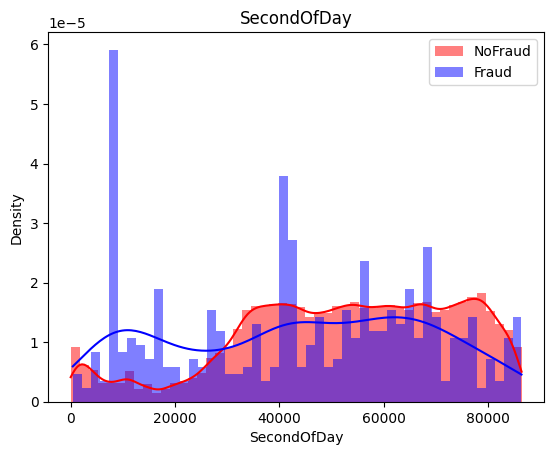

In [63]:
df['SecondOfDay'] = (df['Time'] % (24 * 60 * 60)) # feature transformation timestamp -> second of each day
plot_per_class_distributions(df=df,feature = "SecondOfDay",target_column="Class",target_2_label=target_2_label)

We cannot make the walk forward validation (time series version of cross validation). Furthermore, note that for the second day there is only one peak whereas in the other plot above, there were two peaks. This is an indicator of a cyclic pattern in the data that repeats on a dayly basis. Moreover, only the legitimate activity follows a cyclic pattern whereas the fraudulent data can happen anytime.
We do not want to train for less than a day since we need to process on the full cycle. This is why the first day will correspond to the training data, and the second date will correspond to the testing data.

In [64]:
df_train = df[df['Time'] <= 24 * 60 * 60]
df_test = df[df['Time'] > 24 * 60 * 60]

In [65]:
features = ['SecondOfDay', 'Amount'] + [f"V{i}" for i in range(1, 29)]
print(features)

['SecondOfDay', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [66]:
X_train,y_train = df_train[features],df_train["Class"] # training data and labels
X_test,y_test = df_test[features],df_test["Class"] # testing data and labels

In [67]:
# train the model
model = GaussianNB()
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.9860070310179782
[~] test acc: 0.9852663905156406


In [69]:
print_metrics(X_train, y_train,model, 'Train')

[~] Train AUC: 0.9558893563655547
[~] Train precision: 0.10394916023604175
[~] Train recall: 0.8149466192170819
[~] Train f1: 0.18438003220611918


In [70]:
print_metrics(X_test, y_test,model, 'Test')

[~] Test AUC: 0.9734110846351349
[~] Test precision: 0.07832422586520947
[~] Test recall: 0.8151658767772512
[~] Test f1: 0.1429164935604487


# Training based on distribution comparison
The last experiment for this case is to train only selecting the features whose distributions are separated relative to the class the sample belongs to.

In [71]:
features = [3, 4, 9, 10, 11, 12, 14, 16, 17, 19] # features with different distributions according to me
features = [f"V{i}" for i in features]

In [72]:
X_train,y_train = df_train[features],df_train["Class"] # training data and labels
X_test,y_test = df_test[features],df_test["Class"] # testing data and labels

In [73]:
# train the model
model = GaussianNB()
model.fit(
    X_train,
    y_train
)

print(f"[~] train acc: {model.score(X_train, y_train)}")
print(f"[~] test acc: {model.score(X_test, y_test)}")

[~] train acc: 0.990282276723739
[~] test acc: 0.9911084130838451


In [75]:
print_metrics(X_train, y_train,model, 'Train')

[~] Train AUC: 0.9621724877091387
[~] Train precision: 0.15031055900621118
[~] Train recall: 0.8612099644128114
[~] Train f1: 0.25594923320994184


In [76]:
print_metrics(X_test, y_test,model, 'Test')

[~] Test AUC: 0.9802496289877398
[~] Test precision: 0.12644508670520233
[~] Test recall: 0.8293838862559242
[~] Test f1: 0.21943573667711602
